In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
from pathlib import Path

- (A-1b) Analýza štruktúr dát ako súbory (štruktúry a vzťahy, počet, typy, …), záznamy (štruktúry, počet záznamov, počet atribútov, typy, …)

In [2]:
folder = Path("./070")

# it is possible there will only need to be .info(), .shape and 
# some comment about the attributes and that each dataset has imei 

# This code will handle the column 'ts' as datetime type instead of string
data = pd.read_csv(folder / "connections.csv", delimiter="\t", parse_dates=['ts'])
# data.head()
data.info()
# print(data.shape) # (15068, 13) (rows, columns)
data.describe()
# NOTES connections.csv:
# column 'ts' had to be converted to date from a string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15068 entries, 0 to 15067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ts                 15068 non-null  datetime64[ns]
 1   imei               15068 non-null  int64         
 2   mwra               15068 non-null  float64       
 3   c.android.youtube  15068 non-null  float64       
 4   c.katana           15068 non-null  float64       
 5   c.dogalize         15068 non-null  float64       
 6   c.android.chrome   15068 non-null  float64       
 7   c.android.gm       15068 non-null  float64       
 8   c.UCMobile.x86     15068 non-null  float64       
 9   c.raider           15068 non-null  float64       
 10  c.android.vending  15068 non-null  float64       
 11  c.updateassist     15068 non-null  float64       
 12  c.UCMobile.intl    15068 non-null  float64       
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 1.5

,ts,imei,mwra,c.android.youtube,c.katana,c.dogalize,c.android.chrome,c.android.gm,c.UCMobile.x86,c.raider,c.android.vending,c.updateassist,c.UCMobile.intl
count,15068,1.506800e+04,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000
mean,2018-05-10 14:03:46.122909696,3.915151e+18,0.627091,14.224016,12.933420,11.213860,11.748367,12.395181,49.691045,50.304422,49.846238,49.795751,49.805725
min,2018-05-05 10:00:00,3.590434e+17,0.000000,5.205940,3.670310,1.794050,1.332370,3.978430,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-05-07 23:58:45,8.630331e+17,0.000000,12.887115,11.041332,9.468405,9.869288,10.526928,24.404520,25.599992,24.614873,24.474610,24.732795
50%,2018-05-10 14:04:30,3.590434e+18,1.000000,14.228200,13.045560,11.071870,11.595440,12.587570,49.596390,50.565775,49.828965,49.450900,49.536500
75%,2018-05-13 04:05:15,8.630331e+18,1.000000,15.546828,14.838530,12.841680,13.576078,14.323585,74.844188,75.281260,75.347318,75.000933,74.833070
max,2018-05-15 18:08:00,8.630331e+18,1.000000,22.757320,22.669430,21.240890,22.079670,20.083960,100.000000,100.000000,100.000000,100.000000,100.000000
std,NaN,3.329756e+18,0.483594,2.016526,2.685007,2.567502,2.700146,2.509716,28.923322,28.806473,29.013212,28.962832,28.841978


In [3]:
data2 = pd.read_csv(folder / "devices.csv", delimiter='\t')
# data2.head()
data2.info()
# data2.columns
# data2.shape    # (2889, 6)
# data2.loc[data2['code'].isna(), :] # 2 dupplicates but have different imei number
# data2.describe()
# len(data2["imei"].unique()) # there are 499 unique imei values


# NOTES devces.csv:
# two rows have missing code attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    2889 non-null   float64
 1   longitude   2889 non-null   float64
 2   store_name  2889 non-null   object 
 3   code        2887 non-null   object 
 4   location    2889 non-null   object 
 5   imei        2889 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 135.6+ KB


In [4]:
data3 = pd.read_csv(folder / "processes.csv", delimiter='\t', parse_dates=['ts'])
data3.info()
data3.describe()
# data3.columns
# data3.shape # (15068, 23)

# NOTES processes.csv:
# attribute ts is string again, it had to be convered to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15068 entries, 0 to 15067
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ts                          15068 non-null  datetime64[ns]
 1   imei                        15068 non-null  int64         
 2   mwra                        15068 non-null  float64       
 3   p.android.chrome            15068 non-null  float64       
 4   p.android.documentsui       15068 non-null  float64       
 5   p.android.packageinstaller  15068 non-null  float64       
 6   p.android.settings          15068 non-null  float64       
 7   p.android.gm                15068 non-null  float64       
 8   p.android.externalstorage   15068 non-null  float64       
 9   p.system                    15068 non-null  float64       
 10  p.android.gms               15068 non-null  float64       
 11  p.dogalize                  15068 non-null  float64   

,ts,imei,mwra,p.android.chrome,p.android.documentsui,p.android.packageinstaller,p.android.settings,p.android.gm,p.android.externalstorage,p.system,...,p.katana,p.google,p.notifier,p.android.defcontainer,p.android.vending,p.inputmethod.latin,p.simulator,p.olauncher,p.browser.provider,p.gms.persistent
count,15068,1.506800e+04,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,...,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000,15068.000000
mean,2018-05-10 14:03:46.122909696,3.915151e+18,0.627091,13.014366,11.873133,12.413431,11.775762,11.884577,13.565926,13.045076,...,57.771071,50.500848,51.616398,49.479308,50.036077,49.662188,50.022369,50.280685,49.802585,49.596038
min,2018-05-05 10:00:00,3.590434e+17,0.000000,3.966290,1.559730,1.007100,3.161590,4.495340,2.811670,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-05-07 23:58:45,8.630331e+17,0.000000,11.241000,9.978880,10.472025,9.898315,10.061623,12.042350,11.304398,...,49.853383,41.479760,42.143080,24.496468,24.995170,24.685540,24.875740,25.251340,25.369325,24.121492
50%,2018-05-10 14:04:30,3.590434e+18,1.000000,13.145975,11.956695,12.503790,11.470175,11.614480,13.734705,13.316080,...,57.815155,50.508840,51.530220,49.266070,50.377720,49.267805,50.384910,50.065190,49.893115,50.034575
75%,2018-05-13 04:05:15,8.630331e+18,1.000000,14.847605,13.868025,14.388110,13.404352,13.596625,15.226465,14.960355,...,65.631797,59.638595,60.987575,74.711660,75.068038,74.860000,74.912595,75.308072,74.213670,74.835037
max,2018-05-15 18:08:00,8.630331e+18,1.000000,21.390630,19.398150,22.167830,23.608310,21.760910,21.647200,22.044580,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
std,NaN,3.329756e+18,0.483594,2.581229,2.629561,2.734532,2.684841,2.499453,2.487413,2.712061,...,11.602200,13.416643,14.111102,28.947431,28.856000,28.973659,28.961131,28.825625,28.700681,29.069049


In [5]:
data4 = pd.read_csv(folder / "profiles.csv", delimiter='\t')
data4.info()
data4.head()
# data4.describe
# data4.columns
# data4.shape # (15068, 23)
print(len(data4['imei'].unique()))


# NOTES profiles.csv:
# almost every attribute except imei and user_id are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2611 entries, 0 to 2610
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   address           2219 non-null   object
 1   job               783 non-null    object
 2   birthdate         1436 non-null   object
 3   name              2611 non-null   object
 4   registration      2611 non-null   object
 5   imei              2611 non-null   int64 
 6   ssn               2611 non-null   object
 7   username          2611 non-null   object
 8   user_id           2611 non-null   int64 
 9   company           2611 non-null   object
 10  current_location  2480 non-null   object
 11  mail              2611 non-null   object
dtypes: int64(2), object(10)
memory usage: 244.9+ KB
497


In [6]:
# all attributes:
# ['ts', 'imei', 'mwra', 'c.android.youtube', 'c.katana', 'c.dogalize',
# 'c.android.chrome', 'c.android.gm', 'c.UCMobile.x86', 'c.raider',
# 'c.android.vending', 'c.updateassist', 'c.UCMobile.intl']

# ['latitude', 'longitude', 'store_name', 'code', 'location', 'imei']

# ['ts', 'imei', 'mwra', 'p.android.chrome', 'p.android.documentsui',
# 'p.android.packageinstaller', 'p.android.settings', 'p.android.gm',
# 'p.android.externalstorage', 'p.system', 'p.android.gms', 'p.dogalize',
# 'p.process.gapps', 'p.katana', 'p.google', 'p.notifier',
# 'p.android.defcontainer', 'p.android.vending', 'p.inputmethod.latin',
# 'p.simulator', 'p.olauncher', 'p.browser.provider', 'p.gms.persistent']

#['address', 'job', 'birthdate', 'name', 'registration', 'imei', 'ssn',
# 'username', 'user_id', 'company', 'current_location', 'mail']


# all data have imei attribute with  

- (B-1b) Analýza jednotlivých atribútov: pre zvolené významné atribúty (min 10) analyzujte ich distribúcie a základné deskriptívne štatistiky. 


In [7]:
# interesting attributes
# imei, ts, latitude, longitude, storename, c.android.chrome,
# p.katana, p.android.gms, current_location, username
imei = data['imei']


- (C-1b) Párová analýza dát: Identifikujte vzťahy a závislostí medzi dvojicami atribútov.

In [ ]:
# numeric vs numeric
# scatter plot  + colour

# numeric vs categorical -> ANOVA /KW  , grouped boxplot

- (D-1b) Párová analýza dát: Identifikujte závislosti medzi predikovanou premennou a ostatnými premennými (potenciálnymi prediktormi).

In [8]:
# in this step we will create correlation matrix for each set of data with numeric
# collumns and show it on a heat map

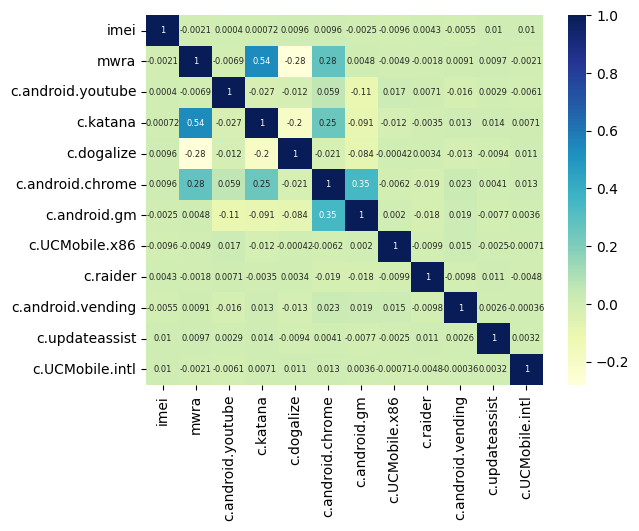

In [9]:
data_corr = data.corr(numeric_only=True)
dataplot = sns.heatmap(data_corr, cmap="YlGnBu", annot=True, annot_kws={"size": 6})
plt.show()

In [10]:
# from dataset connection.csv there is positive 0.54 correlation between
# c.katana and mwra
# and lowest correlation is with c.dogalize -0.28
data_mwra_corr = data_corr['mwra']
data_corr_filter = data_mwra_corr[data_mwra_corr != 1]
print(data_corr_filter.idxmin(), end=': ')
print(data_corr_filter.min())

print(data_corr_filter.idxmax(), end=': ')
print(data_corr_filter.max())

c.dogalize: -0.2805620409129388
c.katana: 0.53897021524728


In [1]:
# dataplot = sns.heatmap(data2.corr(numeric_only=True), cmap="YlGnBu", annot=True)
# plt.show()

In [12]:
# in dataset devices.csv there isnt mwra columns

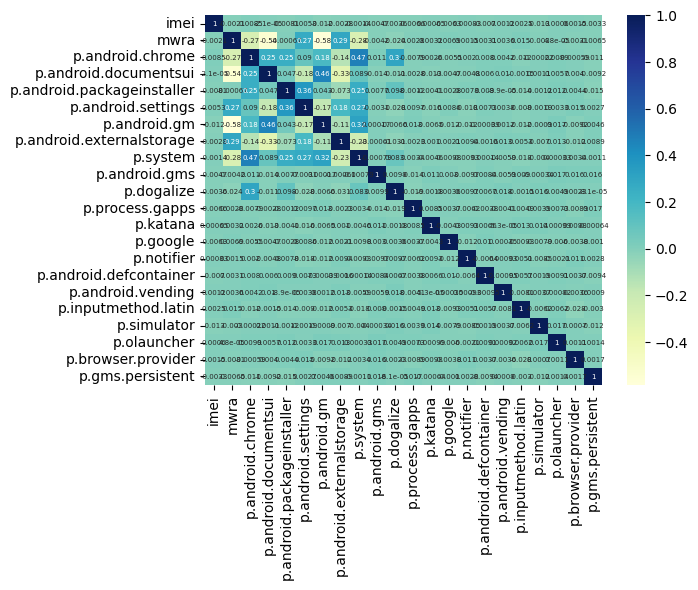

In [13]:
data3_corr = data3.corr(numeric_only=True)
dataplot = sns.heatmap(data3_corr, cmap="YlGnBu", annot=True, annot_kws={"size": 5})
plt.show()

In [14]:
data_mwra_corr = data3_corr['mwra']
data_corr_filter = data_mwra_corr[data_mwra_corr != 1]
print(data_corr_filter.idxmin(), end=': ')
print(data_corr_filter.min())

print(data_corr_filter.idxmax(), end=': ')
print(data_corr_filter.max())

p.android.gm: -0.583415699439614
p.android.externalstorage: 0.2927848024086175


In [2]:
# dataplot = sns.heatmap(data4.corr(numeric_only=True), cmap="YlGnBu", annot=True, annot_kws={"size": 5})
# plt.show()

In [16]:
# correlation with atribute mwra were following

# the greates possitive connections.csv => c.katana: 0.53897021524728

# the gretest negative processes.csv => p.android.gm: -0.583415699439614


NameError: name 'data1' is not defined

: 

- (E-1b) Dokumentujte Vaše prvotné zamyslenie k riešeniu zadania projektu, napr. sú niektoré atribúty medzi sebou závislé? od ktorých atribútov závisí predikovaná premenná? či je potrebné kombinovať záznamy z viacerých súborov?